Построение SVM и выбор оптимального ядра.
Цель: Цель данного ДЗ - "потрогать" алгоритм SVM на практике. Возьмите один из двух датасетов (или выберете свой) и попробуйте получить на нем максимальные метрики качества, используя алгоритм SVM. Проведите сравнение с Логистической регрессией. Используйте техники Feature Preprocessing, изученные ранее. 
   
   Два датасета: 
    
    1) https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge 
    
    2) https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/overview 

С обоими датасетами вы уже знакомы - один был в ДЗб другой на лекции про Feature Preprocessing.

1) Возьмите датасет, выполните предобработку

2) Попробуйте изученные алгоритмы: kNN, Logistic Regression, SVM

3) Выполните настройку гиперпараметров для SVM (выбрать те параметры (ядро, регуляризацияб и тд) при которых метрики максимальны)

4*) Настройку гиперпараметров можно проводить используя GridSearchCV в реализации sklearn.
Критерии оценки: - Выполнена предобработка данных, преобразования признаков, посчитаны базовые статистики
- Построено хотя бы два алгоритма и показана разница результатов (или отсутствие разницы)
- Обучен SVM, выполнен подбор гиперпараметров

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

# in order to display all columns
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [5]:
# Разделим датасет на численные и категориальные переменные
numeric_types = ['int64','float64']
numerical_vars = list(data.select_dtypes(include=numeric_types).columns)
object_vars = list(data.select_dtypes(include=["object"]).columns)

In [6]:
data.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,1.714294e+00,1.458303e+01,1.030694,1.687327,6.343713e+00,15.847557,9.287275e+00,17.564117,9.449335e+00,12.269960,1.431767,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.

In [7]:
data.describe(include='O')

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
count,110864,113821,114321,54211,110864,114321,114318,107439,114321,114321,114321,114321,114321,114318,114318,114321,113939,59017,114244
unique,3,18210,5,7,3,10,12,122,3,9,3,4,18,7,7,3,22,36,90
top,C,AGDF,E,C,A,C,J,BW,A,F,B,D,C,A,E,A,F,G,BM
freq,110584,2386,55177,32178,88347,55425,11103,11351,70353,75094,113560,75087,34561,27079,27079,55688,21671,16252,5759


(array([27300.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 87021.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

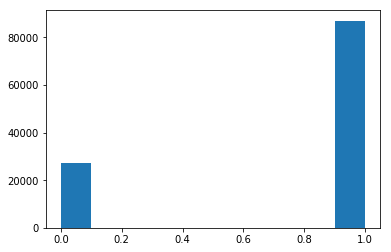

In [8]:
plt.hist(data.target)

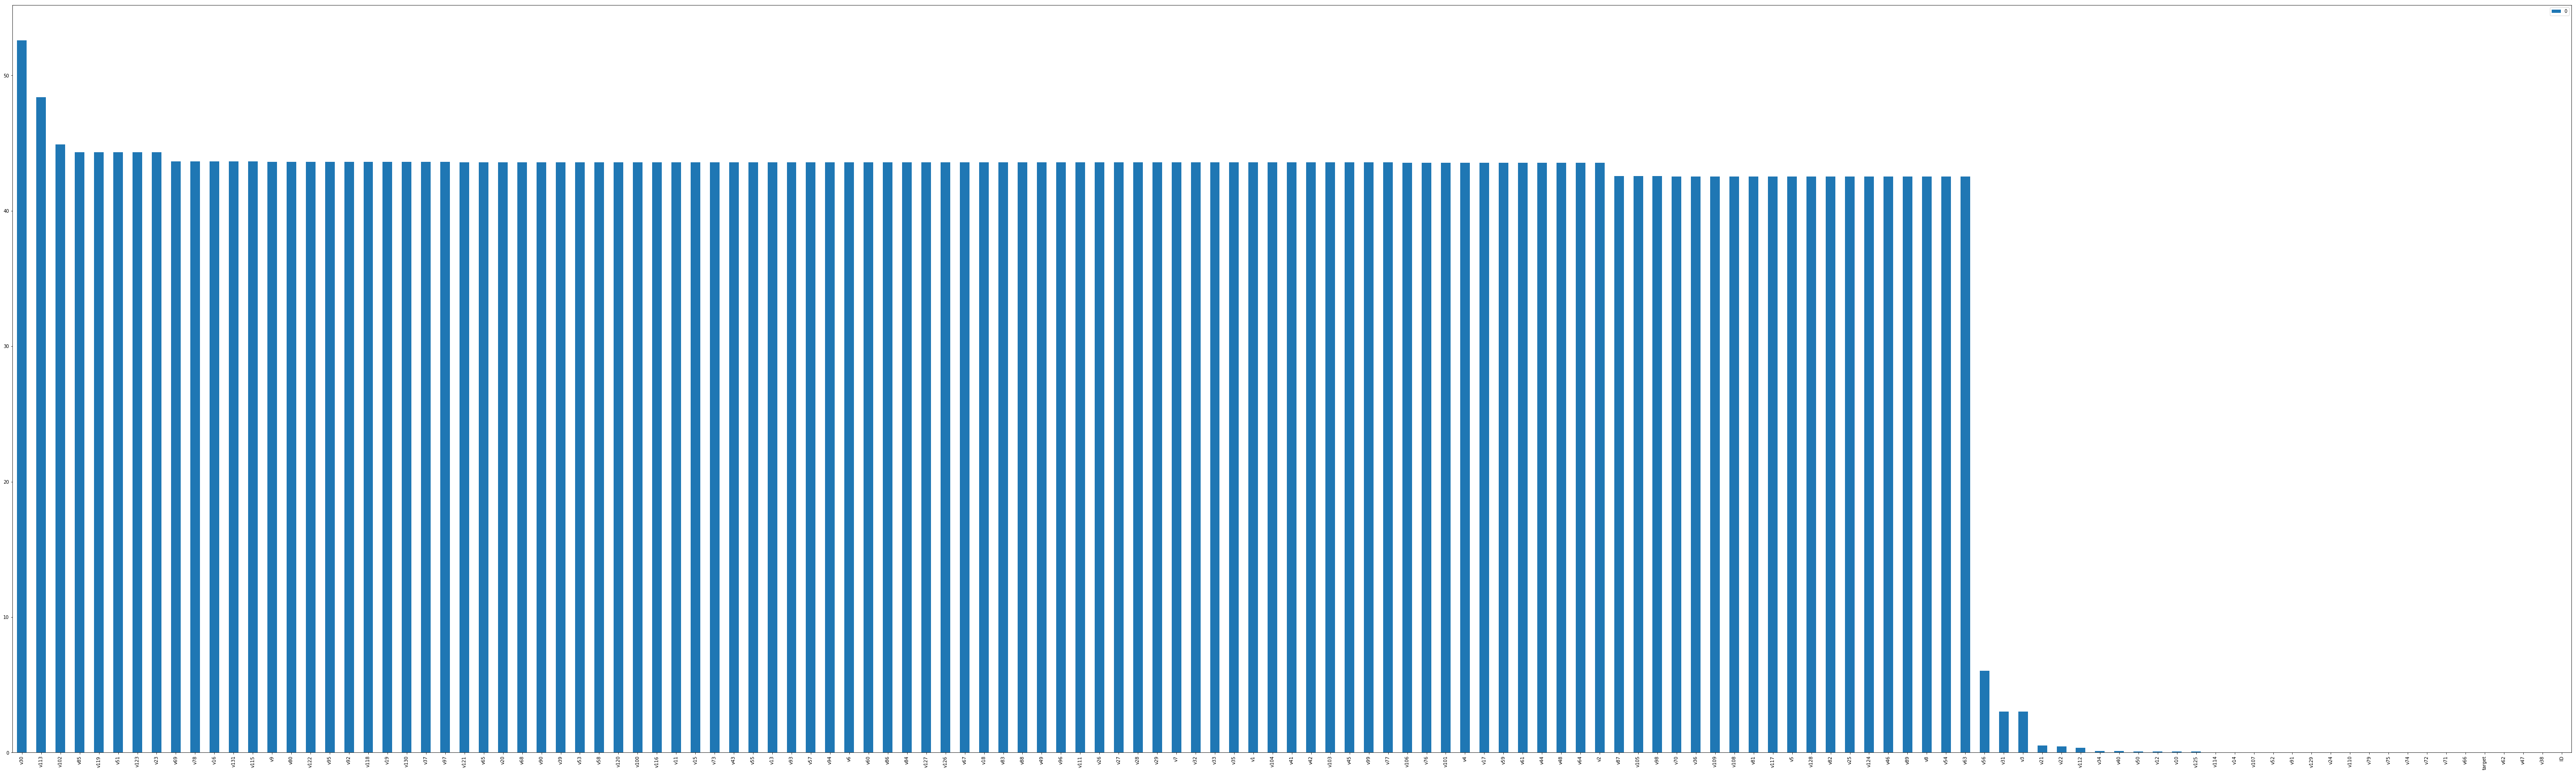

In [9]:
missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing.plot.bar(figsize=(100,30))

Посмотрим на корреляционную матрицу первых нескольких переменных чтобы понять, коррелируют ли они между собой.  

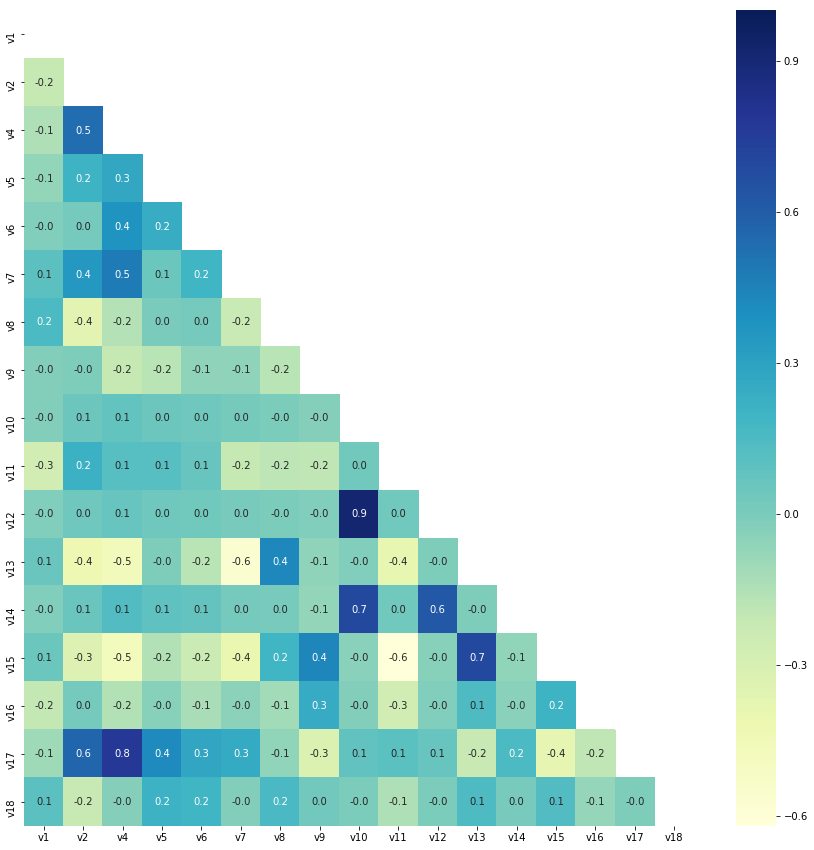

In [10]:
corr_matrix = data.iloc[:,2:20].corr()
plt.figure(figsize=(15,15));
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap="YlGnBu", fmt='.1f')

Поскольку переменные между собой связаны, нам необходимо почистить некоторые из них. Сделаем это с помощью уже известного алгоритма.

In [11]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data.drop(['ID', 'target'], axis=1).corr()
#сортировка корреляций переменных по модулю от большего к меньшему + освобождение от мультииндекса
    corrmat = corrmat.abs().unstack().sort_values(ascending=False)
#сравниваем с threshold
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [12]:
correlated_features = corr_feature_detect(data[numerical_vars])

In [13]:
len(correlated_features)

47

In [14]:
data.drop(correlated_features, axis = 1, inplace = True)

In [15]:
data.shape

(114321, 86)

Теперь мы можем посмотреть распределение значений переменных по разным классам. 

In [16]:
numerical_vars = list(data.select_dtypes(include=numeric_types).columns)
data[numerical_vars].columns

Index(['ID', 'target', 'v2', 'v4', 'v5', 'v6', 'v7', 'v11', 'v12', 'v16',
       'v18', 'v19', 'v20', 'v21', 'v23', 'v27', 'v28', 'v34', 'v35', 'v36',
       'v37', 'v38', 'v39', 'v42', 'v43', 'v44', 'v45', 'v50', 'v51', 'v55',
       'v57', 'v59', 'v61', 'v62', 'v72', 'v73', 'v76', 'v77', 'v80', 'v82',
       'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v92', 'v98', 'v99', 'v100',
       'v101', 'v102', 'v103', 'v104', 'v109', 'v111', 'v115', 'v117', 'v118',
       'v119', 'v120', 'v122', 'v124', 'v126', 'v127', 'v129', 'v131'],
      dtype='object')

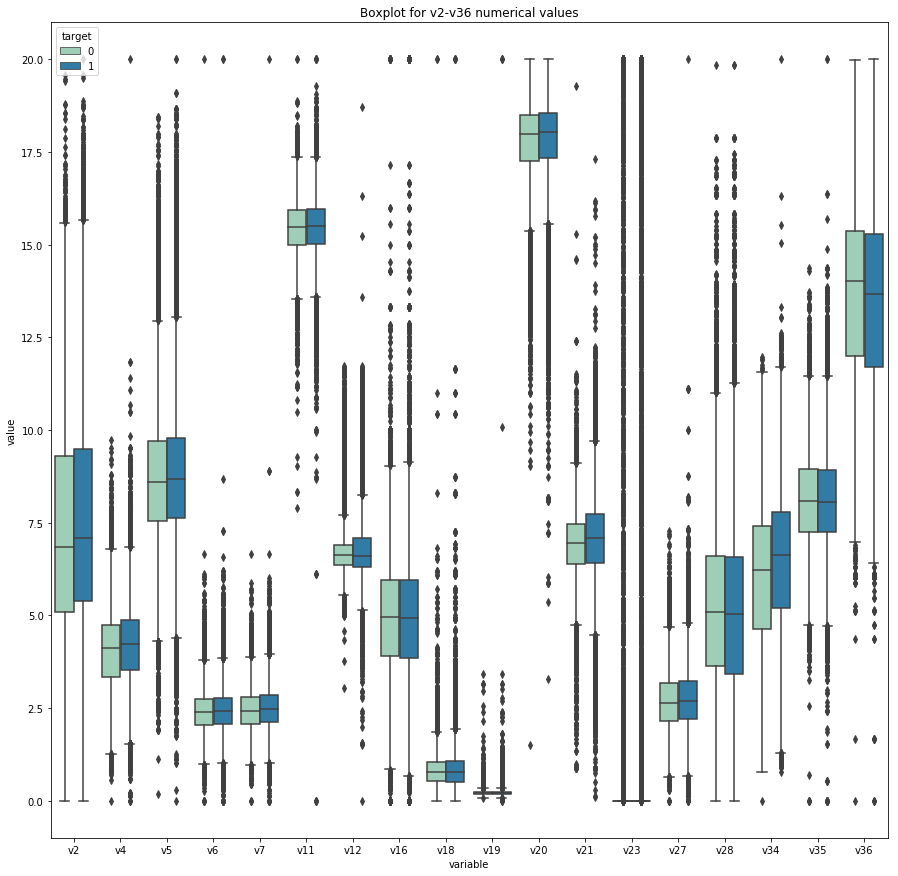

In [17]:
melted_data = pd.melt(data, id_vars = "target", value_vars = ['v2', 'v4', 'v5', 'v6', 'v7', 'v11', 'v12', 'v16',
       'v18', 'v19', 'v20', 'v21', 'v23', 'v27', 'v28', 'v34', 'v35', 'v36'])
plt.figure(figsize = (15,15))
plt.title("Boxplot for v2-v36 numerical values")
sns.boxplot(x = "variable", y = "value", hue="target", data= melted_data, palette = "YlGnBu")
plt.show()

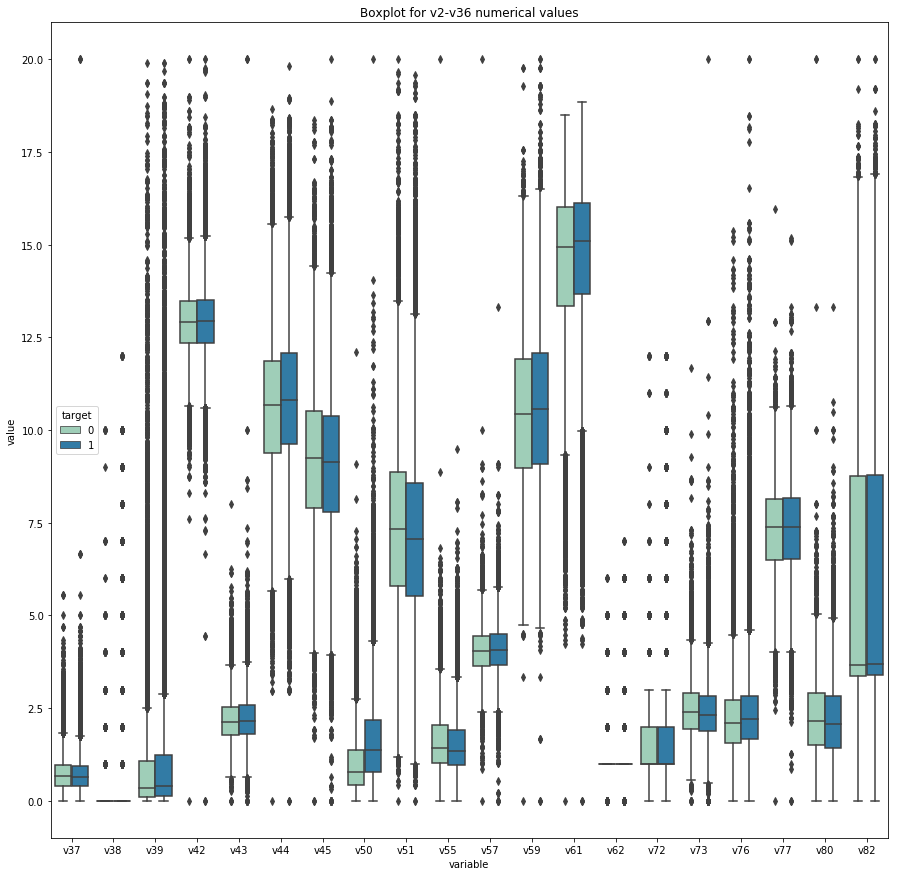

In [18]:
melted_data = pd.melt(data, id_vars = "target", value_vars = ['v37', 'v38', 'v39', 'v42', 'v43', 'v44', 'v45', 'v50', 'v51', 'v55',
       'v57', 'v59', 'v61', 'v62', 'v72', 'v73', 'v76', 'v77', 'v80', 'v82'])
plt.figure(figsize = (15,15))
plt.title("Boxplot for v2-v36 numerical values")
sns.boxplot(x = "variable", y = "value", hue="target", data= melted_data, palette = "YlGnBu")
plt.show()

Переменные, скорее всего являются категориальными, т.к. содержат ограниченное количество значений, что сразу бросается в глаза после отрисовки ящиков с усами. 
И, хотя эти переменные анонимизированы, вероятнее всего они имеют следующие значения: кол-во лет обучения\кол-во детей на попечении\кол-во членов семьи и т.п.

In [19]:
data.v38.nunique(), data.v62.nunique(), data.v72.nunique()

(12, 8, 13)

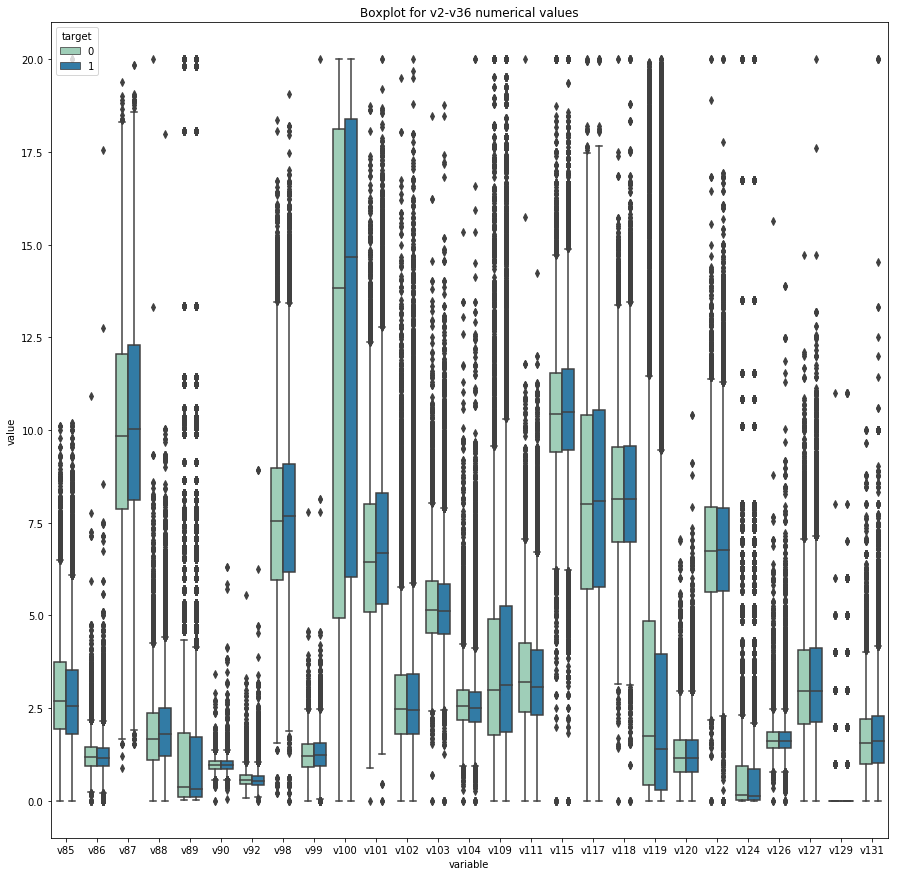

In [20]:
melted_data = pd.melt(data, id_vars = "target", value_vars = ['v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v92', 'v98', 'v99', 'v100',
       'v101', 'v102', 'v103', 'v104', 'v109', 'v111', 'v115', 'v117', 'v118',
       'v119', 'v120', 'v122', 'v124', 'v126', 'v127', 'v129', 'v131'])
plt.figure(figsize = (15,15))
plt.title("Boxplot for v2-v36 numerical values")
sns.boxplot(x = "variable", y = "value", hue="target", data= melted_data, palette = "YlGnBu")
plt.show()

In [21]:
data.v129.nunique()

10

Мы видим, что распределение переменных малло отличается между классами, но имеются выбросы (что может быть критично для линейных моделей) и есть переменные, которые на самом деле являются категориальными

In [22]:
def get_dummy_cols(data, threshold=20):
    nuniq = data.nunique()
    return nuniq[nuniq<=threshold].index.tolist()

In [23]:
get_dummy_cols(data[numerical_vars], threshold=25)

['target', 'v38', 'v62', 'v72', 'v129']

### Работа с категориальными признаками

Посмотрим для начала на переменную v22. 
Всего она содержит 18210 уникальных категорий, но очевидно, что с большинством из них мы работать попросту не будем, т.к. частота, с которой они встречаются в датасете несоизмеримо мала. Попробуем посмотреть на самые часто встречающиеся категории и на распределение таргетов внутри этих категорий.

In [24]:
data.groupby(['v22','target'])['ID'].count().sort_values(ascending = False)

v22   target
AGDF  1         1881
YGJ   1         1595
      0          524
AGDF  0          505
QKI   1          495
PWR   1          490
HZE   1          310
MNZ   1          271
ROZ   1          263
PTO   1          257
YOD   1          226
VZF   1          223
GBS   1          220
WNI   1          200
AJQ   1          193
HDD   1          186
QKI   0          173
NRT   1          170
QVR   1          167
WRI   1          166
PFR   1          165
YEP   1          163
PWR   0          159
VVI   1          151
ADDF  1          149
NGS   1          144
ACWE  1          140
UAG   1          138
PSE   1          136
ABOF  1          135
                ... 
KUH   0            1
KSG   1            1
KUE   1            1
KUD   1            1
KUC   1            1
KUB   1            1
KU    1            1
KTY   1            1
KTW   0            1
KTV   1            1
KTR   1            1
KTP   0            1
KTO   1            1
KTK   0            1
KTF   0            1
KTC   1            1


In [25]:
data.v22.isnull().sum()

500

Самые частые категории: ['AGDF','YGJ', 'QKI', 'PWR', '']

In [26]:
data[(data['v22'].isnull()==True)&(data['target']==1)]['target'].count(), data[(data['v22'].isnull()==True)&(data['target']==0)]['target'].count()

(410, 90)

In [27]:
data[(data['v22']=='YGJ')|(data['v22']=='AGDF')|(data['v22']=='QKI')|(data['v22']=='PWR')][['v22','target','ID']].groupby(['target', 'v22']).count()

ID
target v22       
0      AGDF   505
       PWR    159
       QKI    173
       YGJ    524
1      AGDF  1881
       PWR    490
       QKI    495
       YGJ   1595

Аналогичная проблема (большое количество категорий) наблюдается у переменных [v56, v112, v113, v125]. 
Поработаем с ними аналогичным образом.

In [28]:
def categorical_features(data, column, num_cat = 10): 
    list_frequent_categories = []
    n = 0
    total = 0
    while n<num_cat:
        list_frequent_categories.append(data[column].value_counts().index[n])
        total+=data[column].value_counts()[n]
        n+=1
    print('Percent of these categories at the column [',column,']: ',round(total/len(data[column])*100,2),'%')
    return list_frequent_categories

In [29]:
v22_list = categorical_features(data, 'v22')
v56_list = categorical_features(data, 'v56')
v112_list = categorical_features(data, 'v112')
v113_list = categorical_features(data, 'v113')
v125_list = categorical_features(data, 'v125')

Percent of these categories at the column [ v22 ]:  6.93 %
Percent of these categories at the column [ v56 ]:  58.16 %
Percent of these categories at the column [ v112 ]:  71.91 %
Percent of these categories at the column [ v113 ]:  38.8 %
Percent of these categories at the column [ v125 ]:  33.22 %


In [30]:
def categorical_features_new(data, new_column, column, list_of_categories):
    data[new_column] = 0
    k = 1
    for i in list_of_categories:
        data[new_column] = np.where(data[column]== i, k, data[new_column])
        k+=1
    data.drop([column], axis = 1, inplace = True)

In [31]:
categorical_features_new(data, 'v22_new', 'v22', v22_list)
categorical_features_new(data, 'v56_new', 'v56', v56_list)
categorical_features_new(data, 'v112_new', 'v112', v112_list)
categorical_features_new(data, 'v113_new', 'v113', v113_list)
categorical_features_new(data, 'v125_new', 'v125', v125_list)

### Выбросы

Почистим выбросы с помощью интерквартильного размаха

In [32]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.05) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.95) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

In [33]:
for i in numerical_vars[2:]: 
    outlier_detect_IQR(data, i)

### Заменим пропуски

In [34]:
data[numerical_vars[2:]] = data[numerical_vars[2:]].fillna(data.median())

In [35]:
object_vars = list(data.select_dtypes(include=["object"]).columns)

In [36]:
for i in object_vars: 
    data[i] = data[i].fillna(data[i].mode()[0])

### Бинарные переменные

In [37]:
data_nonbinary = pd.get_dummies(data[object_vars+['v22_new', 'v56_new', 'v112_new', 'v113_new', 'v125_new']])
print (data_nonbinary.columns)

Index(['v22_new', 'v56_new', 'v112_new', 'v113_new', 'v125_new', 'v3_A',
       'v3_B', 'v3_C', 'v24_A', 'v24_B', 'v24_C', 'v24_D', 'v24_E', 'v30_A',
       'v30_B', 'v30_C', 'v30_D', 'v30_E', 'v30_F', 'v30_G', 'v31_A', 'v31_B',
       'v31_C', 'v47_A', 'v47_B', 'v47_C', 'v47_D', 'v47_E', 'v47_F', 'v47_G',
       'v47_H', 'v47_I', 'v47_J', 'v52_A', 'v52_B', 'v52_C', 'v52_D', 'v52_E',
       'v52_F', 'v52_G', 'v52_H', 'v52_I', 'v52_J', 'v52_K', 'v52_L', 'v66_A',
       'v66_B', 'v66_C', 'v71_A', 'v71_B', 'v71_C', 'v71_D', 'v71_F', 'v71_G',
       'v71_I', 'v71_K', 'v71_L', 'v74_A', 'v74_B', 'v74_C', 'v75_A', 'v75_B',
       'v75_C', 'v75_D', 'v79_A', 'v79_B', 'v79_C', 'v79_D', 'v79_E', 'v79_F',
       'v79_G', 'v79_H', 'v79_I', 'v79_J', 'v79_K', 'v79_L', 'v79_M', 'v79_N',
       'v79_O', 'v79_P', 'v79_Q', 'v79_R', 'v91_A', 'v91_B', 'v91_C', 'v91_D',
       'v91_E', 'v91_F', 'v91_G', 'v107_A', 'v107_B', 'v107_C', 'v107_D',
       'v107_E', 'v107_F', 'v107_G', 'v110_A', 'v110_B', 'v110_C'

In [38]:
data.drop((object_vars+['v22_new', 'v56_new', 'v112_new', 'v113_new', 'v125_new']), axis = 1, inplace = True )

In [39]:
df = pd.concat((data, data_nonbinary), axis = 1)

In [40]:
df.shape

(114321, 166)

### Логистическая регрессия

In [41]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score

In [42]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['ID','target'], axis = 1),
                                                    df['target'], 
                                                    stratify = df['target'], 
                                                    test_size = 0.3, 
                                                    random_state = 11)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train, y_train)
pred = model_LogR.predict(X_test)

In [44]:
quality_list = quality_report(pred, y_test.values)
df_quality = pd.DataFrame(
    [quality_list],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["Logistic Regression"]
)
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.774
Precision: 	 0.977
Recall: 	 0.781
f1_score: 	 0.868
ROC-AUC: 	 0.709



,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.774,0.977,0.781,0.868,0.709


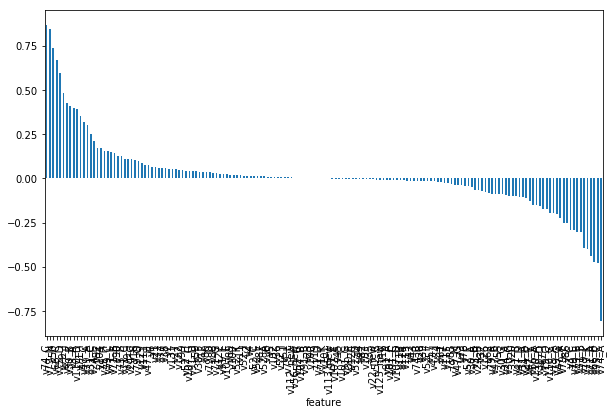

In [45]:
featureImportance = pd.DataFrame({"feature": X_train.columns, "importance": model_LogR.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [46]:
featureImportance.sort_values(by = 'importance').head(20)

,importance
feature,
v74_A,-0.808886
v75_C,-0.481550
v66_B,-0.474716
v71_A,-0.439364
v79_K,-0.399274
v79_P,-0.394824
v71_F,-0.305151
v79_B,-0.303314
v79_E,-0.294384


In [47]:
featureImportance.sort_values(by = 'importance').tail(20)

,importance
feature,
v71_L,0.150953
v79_C,0.154010
v79_H,0.156285
v104,0.169448
v92,0.171658
v24_E,0.210289
v31_C,0.253395
v79_A,0.300951
v47_C,0.318874


In [48]:
most_important_features = []
most_important_features = featureImportance.sort_values(by = 'importance').reset_index().feature[0:15].to_list()
most_important_features = most_important_features + featureImportance.sort_values(by = 'importance').reset_index().feature[-15:].to_list()

In [49]:
most_important_features

['v74_A',
 'v75_C',
 'v66_B',
 'v71_A',
 'v79_K',
 'v79_P',
 'v71_F',
 'v79_B',
 'v79_E',
 'v3_C',
 'v86',
 'v79_F',
 'v47_A',
 'v79_G',
 'v75_A',
 'v24_E',
 'v31_C',
 'v79_A',
 'v47_C',
 'v71_I',
 'v110_B',
 'v3_A',
 'v30_B',
 'v47_F',
 'v79_J',
 'v75_D',
 'v66_C',
 'v50',
 'v79_N',
 'v74_C']

### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
quality_list = quality_report(pred_knn, y_test.values)


=== Quality Report ===
Accuracy: 	 0.717
Precision: 	 0.864
Recall: 	 0.786
f1_score: 	 0.823
ROC-AUC: 	 0.575



In [52]:
df_quality.loc["KNN n_neig = 3", :]= quality_list
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.774,0.977,0.781,0.868,0.709
KNN n_neig = 3,0.717,0.864,0.786,0.823,0.575


### Support Vector 

SVC - это....

Параметры распиши, что означает каждый из них и проч. 
Потом GridSearchCV от руки

Wiki:
    
    Метод опорных векторов (англ. SVM, support vector machine) — набор схожих алгоритмов обучения с учителем, использующихся для задач классификации и регрессионного анализа. Принадлежит семейству линейных классификаторов и может также рассматриваться как специальный случай регуляризации по Тихонову. Особым свойством метода опорных векторов является непрерывное уменьшение эмпирической ошибки классификации и увеличение зазора, поэтому метод также известен как метод классификатора с максимальным зазором.

### Немного математики
<img src= "./Screenshot_14.png">
<img src= "./Screenshot_15.png">
<img src= "./Screenshot_2.png">
<img src= "./Screenshot_3.png">

[https://habr.com/ru/post/105220/]

### Алгоритм Support Vector Classification (SVC) и его параметры

**class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)**

Параметры: 

- **C: float, optional (default=1.0)** - Параметр регуляризации. Сила регуляризации обратно пропорциональна С. Должна быть строго положительной;
- **kernel: string, optional (default=’rbf’)** - Определяет тип ядра, который будет использоваться в алгоритме. Это должен быть ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ или вызываемый. Если ничего не указано, будет использовано «rbf».
- **degree: int, optional (default=3)** - Степень функции ядра полинома («poly»). Игнорируется всеми другими ядрами.
- **gamma: {‘scale’, ‘auto’} or float, optional (default=’scale’)** - Коэффициент ядра для «rbf», «poly» и «sigmoid». Если передается gamma = 'scale' (по умолчанию), то в качестве значения гаммы используется 1 / (n_features * X.var ()), если 'auto', использует 1 / n_features.
- **coef0: float, optional (default=0.0)** - Независимый член в функции ядра. Это имеет значение только в «poly» и «sigmoid».
- **shrinking: boolean, optional (default=True)** - Следует ли использовать сокращающуюся эвристику.
- **probability: boolean, optional (default=False)** - Включить ли оценки вероятности. Это должно быть включено до вызова fit, что приведет к замедлению этого метода, поскольку он внутренне использует 5-кратную перекрестную проверку, а predict_proba может быть несовместим с predict.
- **tol: float, optional (default=1e-3)** - Допуск для критерия остановки.
- **cache_size: float, optional** - Укажите размер kernel cash (в МБ).
- **class_weight: {dict, ‘balanced’}, optional** - Установите для параметра C класса i значение class_weight [i] * C для SVC. Если не дано, все классы должны иметь вес один. В «сбалансированном» режиме значения y используются для автоматической регулировки весов, обратно пропорциональных частотам классов во входных данных как n_samples / (n_classes * np.bincount (y))
- **verbose: bool, default: False** - Включить подробный вывод. Обратите внимание, что этот параметр использует параметр времени выполнения для каждого процесса в libsvm, который, если он включен, может не работать должным образом в многопоточном контексте.
- **max_iter: int, optional (default=-1)** - Жесткий лимит на итерации в solver, или -1 для безлимитного.
- **decision_function_shape: ‘ovo’, ‘ovr’, default=’ovr’** - Возвращать ли решающую функцию one-vs-rest ('ovr') формы (n_samples, n_classes) в качестве всех других классификаторов или исходную функцию принятия решения one-vs-one ('ovo') libsvm, имеющую форму (n_samples) , n_classes * (n_classes - 1) / 2). Тем не менее, один-против-одного («ovo») всегда используется в качестве мультиклассовой стратегии. 
- **break_ties: bool, optional (default=False)** - Если значение равно true, solution_function_shape = 'ovr' и число классов> 2, предикат разорвет связи в соответствии со значениями доверительной вероятности solution_function; в противном случае возвращается первый класс среди связанных классов. Обратите внимание, что разрыв связей связан с относительно высокими вычислительными затратами по сравнению с простым прогнозированием.
- **random_state: int, RandomState instance or None, optional (default=None)** - Генератор псевдослучайных чисел, используемый при перетасовке данных для оценки вероятности. Если int, random_state - это начальное число, используемое генератором случайных чисел; Если экземпляр RandomState, random_state является генератором случайных чисел; Если None, генератор случайных чисел является экземпляром RandomState, используемым np.random.

Но у данного алгоритма есть своя специфика: классический svr и svc может быть напрямую применен только к небольшим наборам данных, т.к. обучение алгоритма поисходит со скоростью O(n_samples^2 * n_features). Для больших датасетов целееобразнее будет применять модификации данных алгоритмов:
sklearn.linear_model.LinearSVC или sklearn.linear_model.SGDClassifier

Для того чтобы посмотреть как данный алгоритм работает на наших данных мы возьмем небольшой сэмпл, сохранив соотношение классов и попробуем подобрать параметры на нём.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [54]:
#Попробуем отделить часть данных с помощью eще одного шага train_test_split со стратификацией целевой перменной.
#при этом в датасете оставим только самые важные переменные, которые ранне были выделены в шаге feature_importances
X_train_svc1, X_test_svc1, y_train_svc1, y_test_svc1 = train_test_split(X_test[most_important_features], y_test, stratify = y_test, test_size = 0.1, random_state = 11)
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_test_svc1[most_important_features], y_test_svc1, stratify = y_test_svc1, test_size = 0.3, random_state = 11)

In [55]:
X_train_svc.shape 

(2401, 30)

In [56]:
C_array = [0.001, 0.1, 0.5, 1.0, 2]
gamma_array = [ 0.001, 0.1, 1., 3., 10.]
kernel = ['linear', 'poly', 'rbf']
svc = SVC()
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'kernel': kernel})

In [57]:
grid.fit(X_train_svc, y_train_svc)

D:\programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.1, 0.5, 1.0, 2], 'gamma': [0.001, 0.1, 1.0, 3.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
pred_svc_rbf = grid.predict(X_test_svc)

In [59]:
quality_list = quality_report(pred_svc_rbf, y_test_svc.values)
df_quality.loc["SVC с kernel=rbf", :]= quality_list
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.776
Precision: 	 0.976
Recall: 	 0.783
f1_score: 	 0.869
ROC-AUC: 	 0.712



,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.774,0.977,0.781,0.868,0.709
KNN n_neig = 3,0.717,0.864,0.786,0.823,0.575
SVC с kernel=rbf,0.776,0.976,0.783,0.869,0.712


In [60]:
sgdc = SGDClassifier()
grid_sgdc = GridSearchCV(sgdc, param_grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
})

In [61]:
grid_sgdc.fit(X_train, y_train)

D:\programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\programs\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\programs\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\programs\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\programs\Anaconda\lib\site-packages\skle

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'n_iter': [1000], 'loss': ['log'], 'penalty': ['l2'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
pred_sgdc = grid_sgdc.predict(X_test)

In [66]:
quality_list = quality_report(pred_sgdc, y_test.values)
df_quality.loc["SGDClassifier", :]= quality_list
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.774
Precision: 	 0.985
Recall: 	 0.777
f1_score: 	 0.869
ROC-AUC: 	 0.728



,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.774,0.977,0.781,0.868,0.709
KNN n_neig = 3,0.717,0.864,0.786,0.823,0.575
SVC с kernel=rbf,0.776,0.976,0.783,0.869,0.712
SGDClassifier,0.774,0.985,0.777,0.869,0.728
